# Nullableset removal

Nullableset was merged with letterset.  This means that being free (labels being letters, not epsilon) is now a dynamic property of the automaton instead of a static property of the labelset.  Some algorithms are meant to work on a free labelset and had compile-time checks on it.  What was done to these checks is listed below. Moreover, as letterset now accepts epsilon, tupleset of letterset considers epsilon in the generators.  This can be seen in functions like `complete`. Full list of these functions is presented here.


# Internal changes

## is_free

It is now a function on automata. Being free is also displayed in `info`.

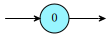

In [1]:
import vcsn

a = vcsn.automaton('''context = lal_char, b
$ -> 0
0 -> $''')
a

Although it is a cached property, a call to `info` computes it as some functions are callable on free automata only:

In [2]:
a.info()

{'is codeterministic': True,
 'is complete': True,
 'is deterministic': 'N/A',
 'is empty': False,
 'is eps-acyclic': True,
 'is free': True,
 'is normalized': True,
 'is proper': True,
 'is standard': True,
 'is trim': True,
 'is useless': False,
 'is valid': True,
 'number of accessible states': 1,
 'number of coaccessible states': 1,
 'number of codeterministic states': 1,
 'number of deterministic states': 1,
 'number of final states': 1,
 'number of initial states': 1,
 'number of lazy states': 0,
 'number of spontaneous transitions': 0,
 'number of states': 1,
 'number of transitions': 0,
 'number of useful states': 1,
 'type': 'mutable_automaton<letterset<char_letters()>, b>'}

## Update of check on free

Static check on `is_letterized` with dynamic check on `is_free`:

- `vcsn/algos/complement.hh`
- `vcsn/algos/complete.hh`
- `vcsn/algos/inductive.hh`: `complement` checks `is_free`
- `vcsn/algos/info.hh`
- `vcsn/algos/is-complete.hh`
- `vcsn/algos/minimize-brzozwoski.hh`
- `vcsn/algos/minimize-hopcroft.hh`
- `vcsn/algos/minimize-moore.hh`
- `vcsn/algos/multiply.hh`
- `vcsn/algos/reduce.hh`
- `vcsn/algos/universal.hh`

Static check on `is_letterized`:
- `vcsn/algos/tags.hh`: beware of `deterministic_tag`, `is_deterministic` does not require `is_free`
- `vcsn/ctx/instantiate.hh`

Dispatch on `is_free`:
- `vcsn/algos/evaluate.hh`: the free version of the algorithm does not compile for non-letterized labelset, so keep an `enable_if` on `is_letterized` for this one
- `vcsn/algos/minimize.hh`
- `vcsn/algos/shortest.hh`

Remove check:
- `vcsn/algos/determinize.hh`
- `vcsn/algos/is-deterministic.hh`
- `vcsn/algos/grail.hh`: `is_deterministic` does not need `is_free` anymore

## Possible issues on generators in tupleset

On context:
- `vcsn/algos/cerny.hh`
- `vcsn/algos/de-bruijn.hh`
- `vcsn/algos/divkbaseb.hh`
- `vcsn/algos/ladybird.hh`
- `vcsn/algos/quotkbaseb.hh`
- `vcsn/algos/u.hh`

On automata:
- `vcsn/algos/complete.hh`
- `vcsn/algos/conjunction.hh`: repeated conjunction of an automaton
- `vcsn/algos/derived-term.hh`
- `vcsn/algos/double-ring.hh`
- `vcsn/algos/efsm.hh`
- `vcsn/algos/is-complete.hh`
- `vcsn/algos/levenshtein.hh`
- `vcsn/algos/minimize-hopcroft.hh`
- `vcsn/algos/minimize-moore.hh`
- `vcsn/algos/pair.hh`
- `vcsn/algos/random_automaton.hh`
- `vcsn/algos/synchronizing-word.hh`: already handled

Others:
- `vcsn/core/rat/expansionset.hh`
- `vcsn/core/rat/expressionset.hxx`

## Miscellaneous

- As letterset have one, `random_label` generates epsilon for letterset.  

- Although nullableset no longer exist, it is still possible to parse it for compatibility reason. This will returns a letterset instead.

- Tupleset now has `show_one(value_t)` to say if epsilon appears on at least one tape of the value.

- This allows `is_proper_tapes_` to work: this function check the presence of espilon on every tapes for all transitions.

- Previously, `conv` function was in charge of handling epsilon.  This did not allow reparsing of `\e` in label class. This handling is moved in `genset::get_letter`.

# Documentation

Precondition on `is_free` stated in documentation:
- `ambiguous_word` but no check on it
- `complement`
- `complete`
- `is_ambiguous` but no check on it
- `is_complete`
- `is_cycle_ambiguous` but no check on it
- `ldivide` but no check on it
- `minimize` checked for brzozowski, hopcroft and moore but not stated for moore: only require `is_deterministic` but now, this does not imply free
- `multiply` for deterministic version
- `reduce`

Still talk about free labelset:
- `doc/notebooks/expression.derived_term.ipynb`
- `doc/notebooks/expression.expansion.ipynb`
- `tests/python/to-expansion.py`